In [1]:
# =============================================================================
# Maintenance Mode Classification using Decision Trees
# Course: Statistics and Data Analysis
# Author: Lewis NDAMBIRI
# =============================================================================

In [2]:
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set style for plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# 2. LOAD AND INSPECT THE DATASET
df = pd.read_excel("Maintenance_St.xlsx", sheet_name=0)

# Display first few rows
print("Dataset shape:", df.shape)
df.head()



Dataset shape: (353, 13)


,Age,Machine_Type,Pressure,Maintenance,Temperature,Engine_problem,Run_Hours,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Operation_modes
0,75.0,0.0,582.0,0.0,20.0,1,265000.00,1.9,130,1,0,11.0,1
1,55.0,0.0,7861.0,0.0,38.0,0,263358.03,1.1,136,1,0,11.0,1
2,65.0,0.0,146.0,0.0,20.0,0,162000.00,1.3,129,1,1,11.0,1
3,50.0,1.0,111.0,0.0,20.0,0,210000.00,1.9,137,1,0,11.0,1
4,65.0,1.0,160.0,1.0,20.0,0,327000.00,2.7,116,0,0,11.0,1


In [4]:
# Remove duplicate header rows (if any)
# The data shows repeated header-like rows; let's clean them
df = df[~df['Age'].astype(str).str.contains("Age", na=False)]
df = df.reset_index(drop=True)

# Convert numeric columns to proper types
numeric_cols = [
    'Age', 'Machine_Type', 'Pressure', 'Maintenance', 'Temperature',
    'Engine_problem', 'Run_Hours', 'Sensor1', 'Sensor2', 'Sensor3',
    'Sensor4', 'Sensor5', 'Operation_modes'
]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

print("Cleaned dataset shape:", df.shape)
df.info()

Cleaned dataset shape: (353, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              352 non-null    float64
 1   Machine_Type     352 non-null    float64
 2   Pressure         352 non-null    float64
 3   Maintenance      352 non-null    float64
 4   Temperature      352 non-null    float64
 5   Engine_problem   353 non-null    int64  
 6   Run_Hours        352 non-null    float64
 7   Sensor1          353 non-null    float64
 8   Sensor2          353 non-null    int64  
 9   Sensor3          353 non-null    int64  
 10  Sensor4          353 non-null    int64  
 11  Sensor5          352 non-null    float64
 12  Operation_modes  353 non-null    int64  
dtypes: float64(8), int64(5)
memory usage: 36.0 KB


In [5]:
# 3. HANDLE MISSING VALUES
print("Missing values per column:")
print(df.isnull().sum())

# Drop rows with missing target (Operation_modes)
df = df.dropna(subset=['Operation_modes'])

# For simplicity, drop rows with any missing features (or impute if preferred)
df = df.dropna()

print("\nAfter dropping missing values:")
print("New shape:", df.shape)

Missing values per column:
Age                1
Machine_Type       1
Pressure           1
Maintenance        1
Temperature        1
Engine_problem     0
Run_Hours          1
Sensor1            0
Sensor2            0
Sensor3            0
Sensor4            0
Sensor5            1
Operation_modes    0
dtype: int64

After dropping missing values:
New shape: (346, 13)


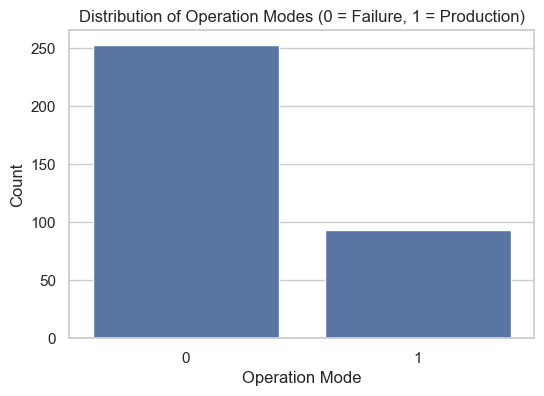

Operation_modes
0    253
1     93
Name: count, dtype: int64


In [6]:
# 4. EXPLORATORY DATA ANALYSIS (EDA)

# Target distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Operation_modes', data=df)
plt.title('Distribution of Operation Modes (0 = Failure, 1 = Production)')
plt.xlabel('Operation Mode')
plt.ylabel('Count')
plt.show()

print(df['Operation_modes'].value_counts())



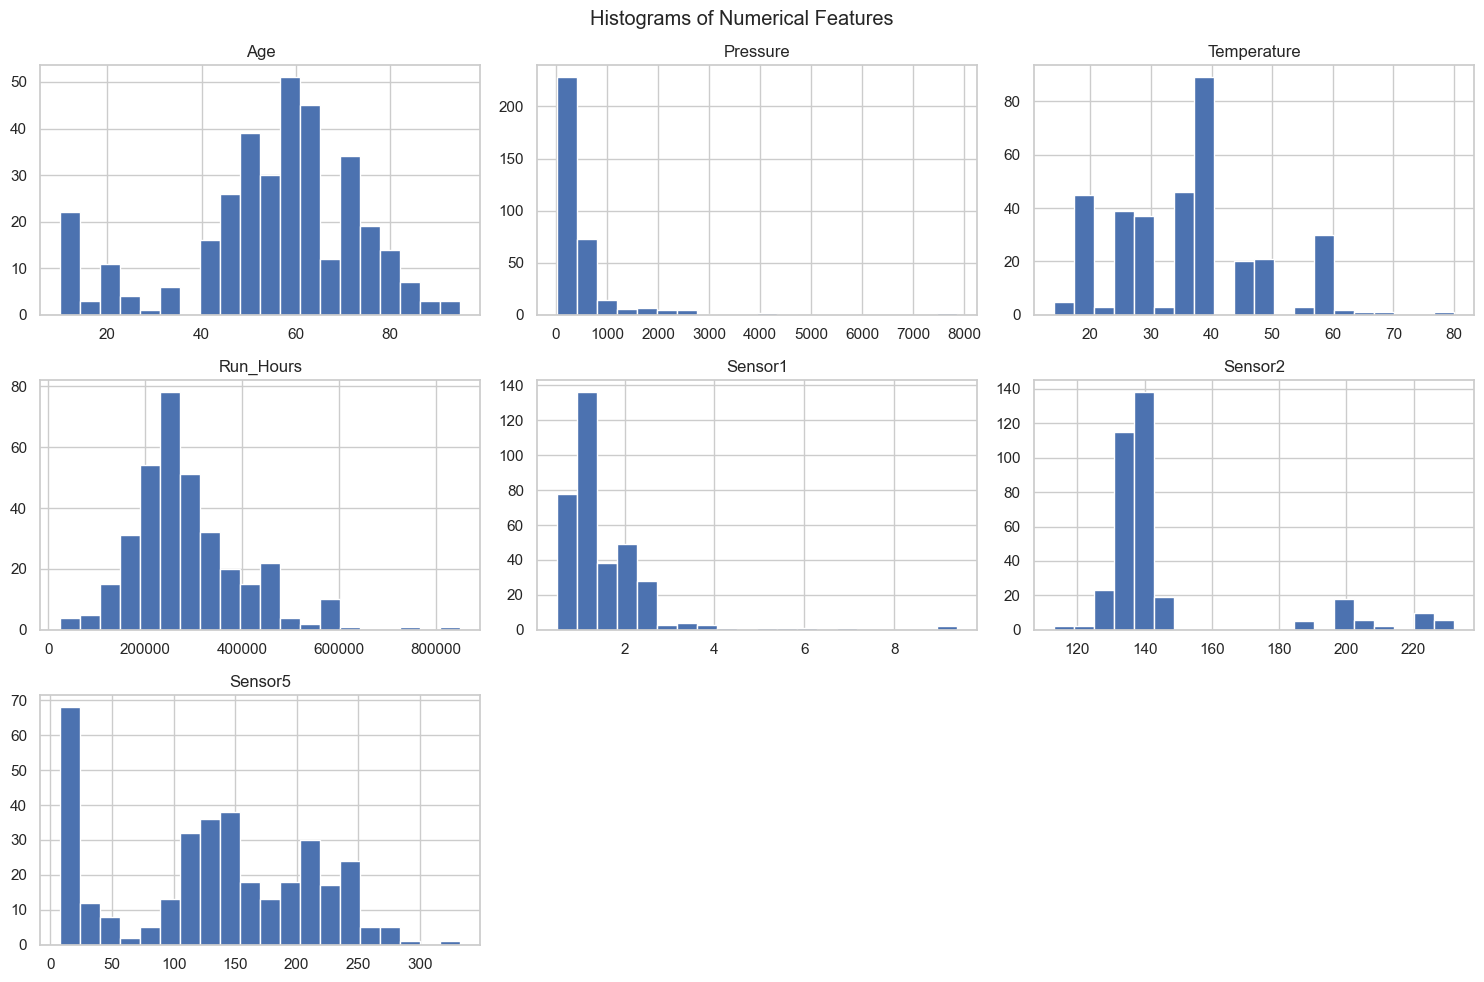

In [7]:
# Numerical feature distributions
num_features = ['Age', 'Pressure', 'Temperature', 'Run_Hours', 'Sensor1', 'Sensor2', 'Sensor5']
df[num_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features')
plt.tight_layout()
plt.show()

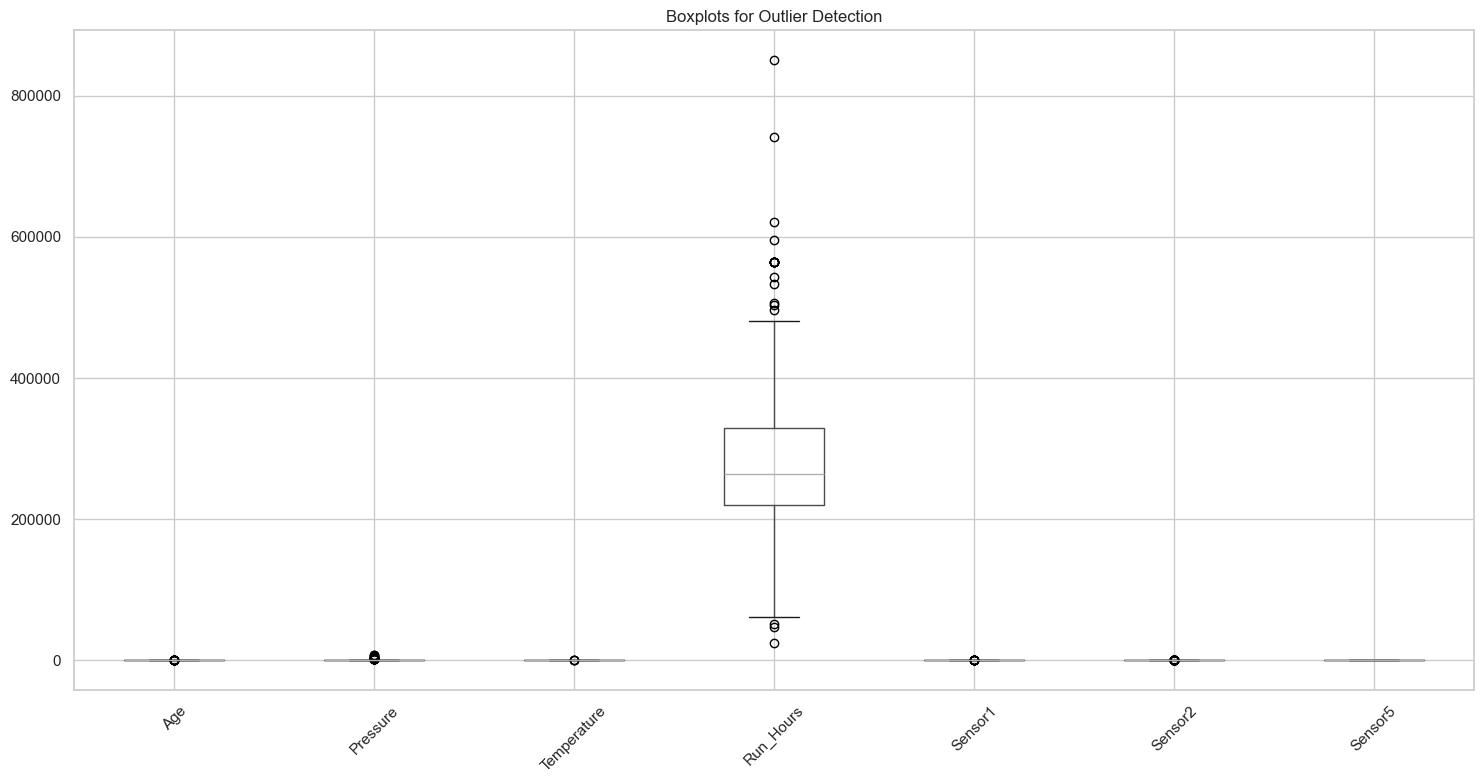

In [8]:
# Boxplots to detect outliers
plt.figure(figsize=(15, 8))
df.boxplot(column=num_features)
plt.title('Boxplots for Outlier Detection')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


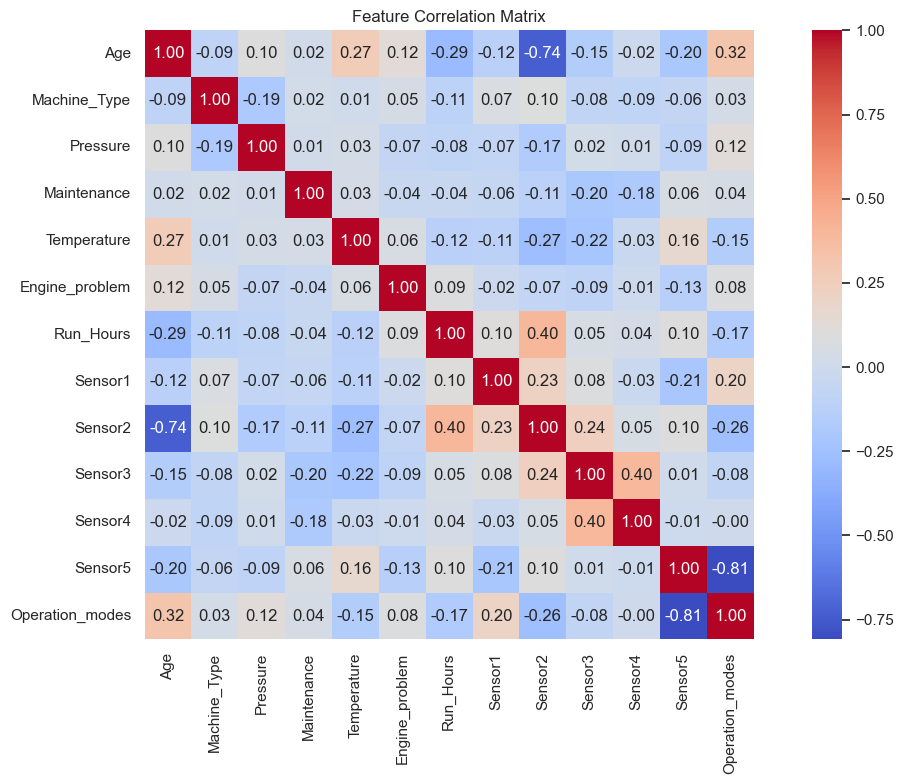

In [9]:

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

In [10]:
# 5. PREPARE DATA FOR MODELING

# Features and target
X = df.drop(columns=['Operation_modes'])
y = df['Operation_modes'].astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (276, 12)
Test set size: (70, 12)


In [11]:
# 6. BUILD DECISION TREE MODEL

# Initialize and train
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,          # Prevent overfitting
    min_samples_split=10,
    min_samples_leaf=5
)

dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

Model Accuracy: 1.0000 (100.00%)

Classification Report:
                precision    recall  f1-score   support

   Failure (0)       1.00      1.00      1.00        51
Production (1)       1.00      1.00      1.00        19

      accuracy                           1.00        70
     macro avg       1.00      1.00      1.00        70
  weighted avg       1.00      1.00      1.00        70



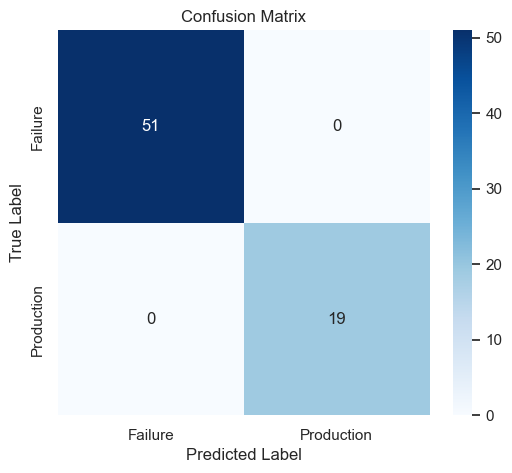

In [12]:
# 7. EVALUATE MODEL

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Failure (0)', 'Production (1)']))

# Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Failure', 'Production'],
            yticklabels=['Failure', 'Production'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

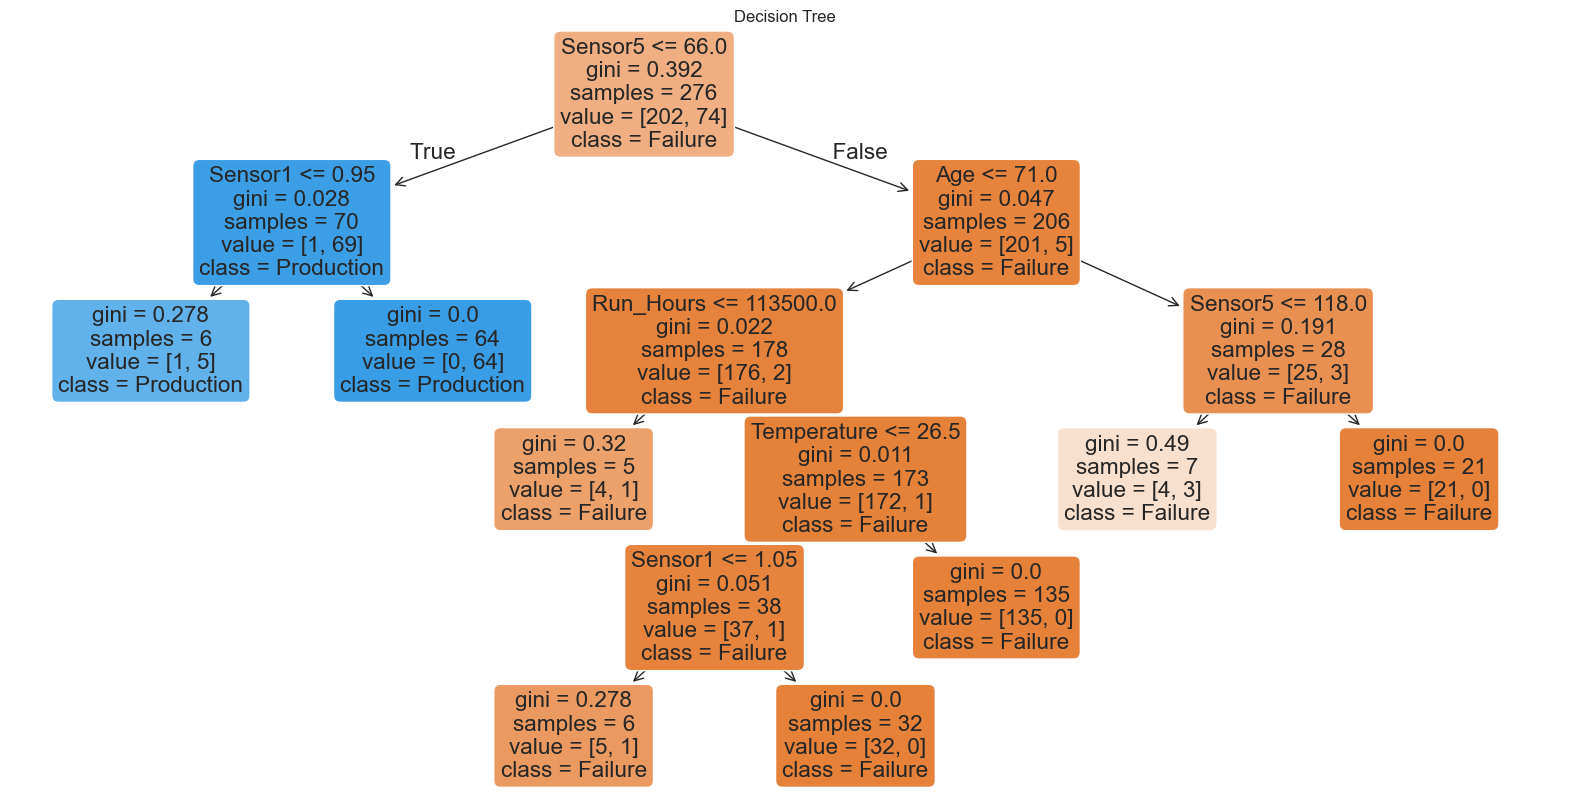

In [13]:
# 8. VISUALIZE DECISION TREE (limited depth for readability)

plt.figure(figsize=(20, 10))
plot_tree(dt_model,
          feature_names=X.columns,
          class_names=['Failure', 'Production'],
          filled=True,
          rounded=True)

plt.title("Decision Tree")
plt.show()

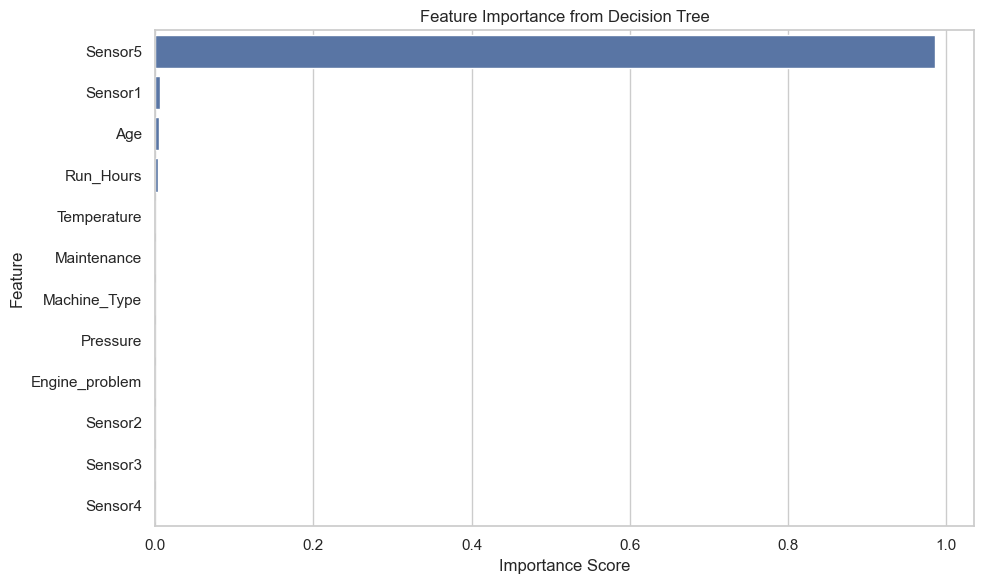

Top 5 Important Features:
        Feature  Importance
11      Sensor5    0.985611
7       Sensor1    0.005857
0           Age    0.004453
6     Run_Hours    0.003668
4   Temperature    0.000411


In [14]:
# 9. FEATURE IMPORTANCE

importance = dt_model.feature_importances_
feat_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Feature Importance from Decision Tree')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print("Top 5 Important Features:")
print(feat_imp.head())

In [15]:
# 10. PREDICT FOR NEW INPUT

# Given sample input
new_input = pd.DataFrame({
    'Age': [55],
    'Machine_Type': [1],
    'Pressure': [140],
    'Maintenance': [0],  
    'Temperature': [50],
    'Engine_problem': [1],
    'Run_Hours': [327777],
    'Sensor1': [3],
    'Sensor2': [120],
    'Sensor3': [1],
    'Sensor4': [1],
    'Sensor5': [20]
})

# Make prediction
prediction = dt_model.predict(new_input)[0]
prob = dt_model.predict_proba(new_input)[0]

mode = "Production" if prediction == 1 else "Failure"
confidence = prob[prediction]

print(f"Predicted Operation Mode: {mode}")
print(f"Confidence: {confidence:.2%}")

Predicted Operation Mode: Production
Confidence: 100.00%


In [16]:
# 11. HOW TO IMPROVE ACCURACY? (Discussion)

"""
Possible improvements:
1. Handle class imbalance using class_weight='balanced' or SMOTE.
2. Feature engineering: e.g., log(Run_Hours), combine sensors.
3. Hyperparameter tuning (GridSearchCV).
4. Try ensemble methods: Random Forest, XGBoost.
5. Impute missing values intelligently instead of dropping.
6. Normalize/Scale features if using other models (not needed for trees).
"""

# Example: Balanced Decision Tree
dt_balanced = DecisionTreeClassifier(
    random_state=42,
    class_weight='balanced',
    max_depth=6
)
dt_balanced.fit(X_train, y_train)
y_pred_bal = dt_balanced.predict(X_test)
print("Balanced model accuracy:", accuracy_score(y_test, y_pred_bal))


Balanced model accuracy: 0.9857142857142858


In [17]:
# END OF NOTEBOOK